# Desicison tree with PIMA dataset

In [1]:
import pandas as pd

In [2]:
pima=pd.read_csv("diabetes.csv")

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


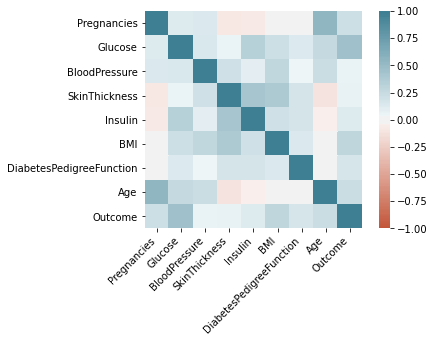

In [5]:
import seaborn as sns
corr = pima.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:


# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = pima[feature_cols]
y = pima.Outcome



In [7]:
y = pima.Outcome

In [8]:


# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)



In [23]:
X_train

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
88,15,110,37.1,43,136,70,0.153
467,0,100,36.8,25,97,64,0.600
550,1,0,27.4,21,116,70,0.204
147,2,119,30.5,34,106,64,1.400
481,0,0,35.2,29,123,88,0.197
...,...,...,...,...,...,...,...
645,2,440,39.4,30,157,74,0.134
715,7,392,33.9,34,187,50,0.826
72,13,0,43.4,42,126,90,0.583
235,4,0,43.6,26,171,72,0.479


In [22]:
Y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 537, dtype: int64

In [10]:
# build model
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)

In [11]:
x

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
764,2,0,36.8,27,122,70,0.340
765,5,112,26.2,30,121,72,0.245
766,1,0,30.1,47,126,60,0.349


In [26]:
X_test.head()

,Pregnancies,Insulin,BMI,Age,Glucose,BloodPressure,DiabetesPedigreeFunction
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206
352,3,0,34.4,46,61,82,0.243
726,1,180,36.1,25,116,78,0.496


In [12]:


# predict
y_pred = classifier.predict(X_test)
print(y_pred)



[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0]


In [14]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)
print(confusion_matrix(Y_test, y_pred))

# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

[[114  32]
 [ 40  45]]
Accuracy: 0.6883116883116883


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
matrix = confusion_matrix(Y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

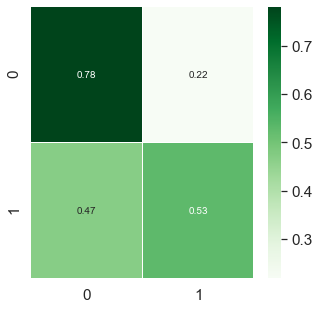

In [19]:
plt.figure(figsize=(5,5))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

In [18]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print("Accuracy for desicison tree:", metrics.accuracy_score(Y_test,y_pred))

Mean Absolute Error: 0.3116883116883117
Mean Squared Error: 0.3116883116883117
Root Mean Squared Error: 0.5582905262390825
Accuracy for desicison tree: 0.6883116883116883
